# **Downlaod dataset**

In [ ]:
!wget 'https://download.microsoft.com/download/5/6/A/56A19DD6-35FB-47A2-A9B2-74E66D269345/msrcorid.tar.gz'
!tar xvzf msrcorid.tar.gz

# **Install and Set up SAM**

In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-egjl8rgx
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-egjl8rgx
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=50bc2721dbc340d2aae690e63ba526bd4a749800b4d16ca540167599ce877837
  Stored in directory: /tmp/pip-ephem-wheel-cache-ls6mrqf3/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [ ]:
CHECKPOINT_PATH='/content/sam_vit_h_4b8939.pth'

import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

# **Generate Masks Automatically**

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)


mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
# Import opencv package
import cv2


# Give the path of your image
IMAGE_PATH= '/content/msrcorid/cars/general/161_6106.JPG'
# Read the image from the path
image= cv2.imread(IMAGE_PATH)
# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Generate segmentation mask
output_mask = mask_generator.generate(image_rgb)
print(output_mask)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 40300, 'bbox': [176, 90, 437, 339], 'predicted_iou': 1.023472785949707, 'point_coords': [[210.0, 112.5]], 'stability_score': 0.9612693786621094, 'crop_box': [0, 0, 640, 480]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 57569, 'bbox': [4, 133, 440, 311], 'predicted_iou': 1.0220859050750732, '

# **Visualize our output mask**

**2 way to dsiplay:**


1)

In [ ]:
!pip install supervision

In [ ]:
import supervision as sv

mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(output_mask)
annotated_image = mask_annotator.annotate(image, detections)

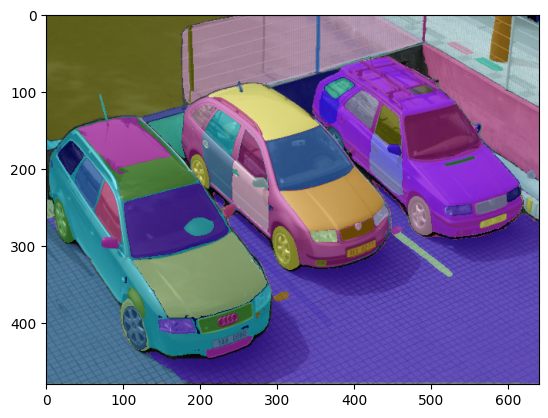

In [ ]:
imgplot = plt.imshow(annotated_image)
plt.show()

2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Function that inputs the output and plots image and mask
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
     # Plot for each segment area
     for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

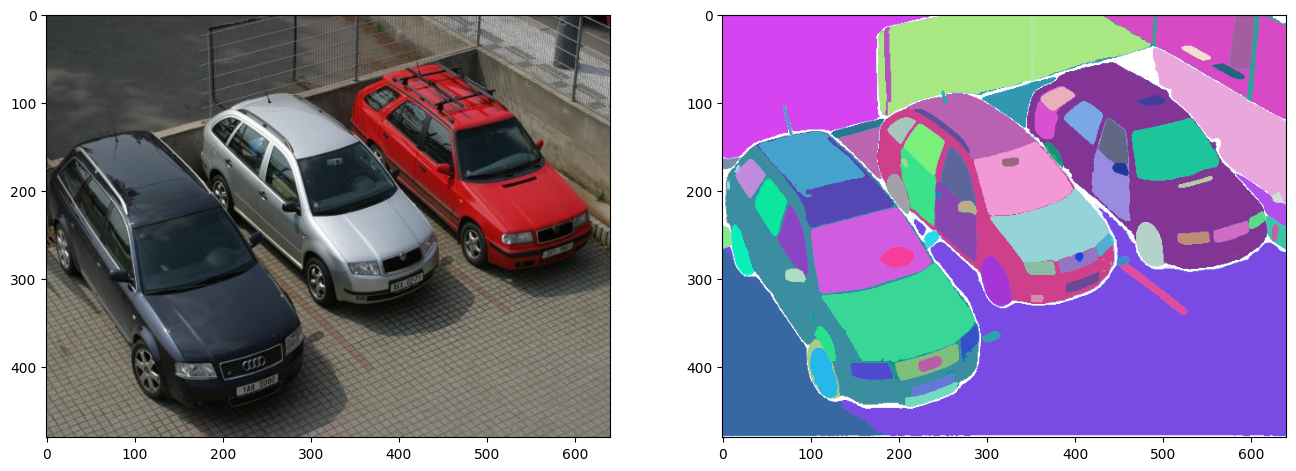

In [ ]:
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(output_mask, axes[1])